![title](logo-utn.png)

## *Fundamentos de la Robótica Móvil.*
### Trabajo Practico N°2: Modelo dinámico de un multirrotor de un grado de libertad.

---

### Integrantes:
- Sanchez Marengo, Nahuel
- Toth Lautaro
- Traverso Osses Facundo

### Objetivo

Estudiar el comportamiento de lazo cerrado de un sistema multirrotor de un grado de libertad tipo balancín utilizando las herramientas de  análisis vistas en la materia de control.

---

### Introducción

Para el presente trabajo, se tendrán en cuenta las siguientes idealizaciones respecto a las características constructivas del balancín:

* Barra de $1m$ de largo con eje centrado en la mitad de la misma
* Masas de $0.2kg$ concentradas en los extremos de la barra

La rotación del balancín en torno a su eje es parametrizada por una función $\theta_o(t)$

![title](balancin.png)


---

#### 1) Obtener las ecuaciones correspondientes a la cinemática de la rotación

La cinemática del balancín, queda descripta por la siguiente ecuación:

$$
\dot\theta_o(t)=\omega(t)
$$

Donde, la velocidad angular instántanea $\omega$(t) es la variación de la posicion angular en el tiempo.
- $\omega$: velocidad angular instantánea 



La variación de la velocidad angular con respecto al tiempo, será la
aceleración angular.

$$
\alpha(t)=\dot\omega(t)=\ddot\theta(t)
$$


---

#### 2) Obtener las ecuaciones correspondientes a la dinámica de la rotación.

La dinámica del balancín, queda descripta de la siguiente forma:

$$
J\dot\omega(t)=T(t)
$$

donde:
- $J$: momento de inercia 
- $\dot\omega$: aceleración angular
- $T$: Torque

El momento de inercia de una distribución de masas puntuales (como es nuestro caso de estudio) se calcula de la siguiente forma:

$$
J = \sum_{i} = m_{1} \cdot {r_{i}}^{2}
$$

Por conveniencia, se elige como centro de rotación el eje del balancín, dando como resultado $J=0,1kg m$ 

---

#### 3) Obtener la función de transferencia de lazo cerrado $G_{cl}(s)$

Partiendo de la ecuación de la dinámica y reemplazando en ella la ecuación de la cinemática, se obtiene:

$$
\ddot \theta_o(t) = \frac{T(t)}{J}
$$

y se calcula su Transformada de Laplace, con el objetivo de obtener la función de transferencia de lazo abierto $G_{ol}(s)=\frac{\Theta_o(s)}{T(s)}$

$$
\mathcal{L} \left\lbrace \ddot \theta_o(t) = \frac{T(t)}{J} \right\rbrace
$$

$$
\Theta_o s^2 + \dot\theta_o(0)s + \theta_o(0) = \frac{T(s)}{J}
$$

Considerando nulas las condiciones iniciales y despejando, se obtiene la función de transferencia:

$$
\Theta_o s^2 = \frac{T(s)}{J}
$$


$$
G_{ol}(s)=\frac{\Theta_o(s)}{T(s)}= \frac{1}{s^2J}
$$

![title](ft1.png)

A continuación, se calcula la función de transferencia a lazo cerrado $G_{cl}$ con ganancia $K$, resultando en un sistema de segundo orden:

$$
G_{cl}(s)=\frac{\Theta_o(s)}{\Theta_r(s)}=\frac{K \cdot G_{ol}}{1 + K \cdot G_{ol}}=\frac{K}{Js^2+K}
$$


#### 4) Calcular las raíces del polinomio característico. Decir qué tipo de respuesta se espera para un escalón aplicado al sistema de lazo cerrado.

El cáculo de las raíces del polinomio característico se realiza igualando a $0$ el denominador de $G_{cl}$. Al ser un sistema de orden 2, se encontrarán 2 raíces $s_0$ y $s_1$

$$
s^2+\frac{K}{J}=0
$$

$$
s_{0,1}=\pm\sqrt{-\frac{K}{J}}=\mp \sqrt{\frac{K}{J}}i
$$


In [58]:
import control 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

J=0.1

Gol = control.tf([1], [J,0,0])

print("Gol = ", Gol)


Gol =  
   1
-------
0.1 s^2



In [59]:
H=1

GolH = Gol * H

GolH

TransferFunction(array([1.]), array([0.1, 0. , 0. ]))

---

#### 5) Utilizando el paquete de control de python graficar el lugar de raíces del sistema con los valores de $k$ que la función asigne por defecto.

Un sistema de segundo orden, puede ser totalmente descripto por dos parámetros, de la siguiente manera:

$$
G(S)=\frac{\omega_n^2}{s^2+2\zeta\omega_ns+\omega_n^2}
$$

donde
* $\omega_n$: frecuencia natural no amortiguada
* $\zeta$: coeficiente de amortiguamiento

Estos parámetros, se pueden obtener de forma gráfica  a partir de la ubicación de los polos de $G(s)$ en el plano $s$:

![title](polos.png)

A continuación, se grafica el lugar de raíces y sobre el mismo se se marcan los polos para $K=0.1$, $K=1$ y $K=10$  

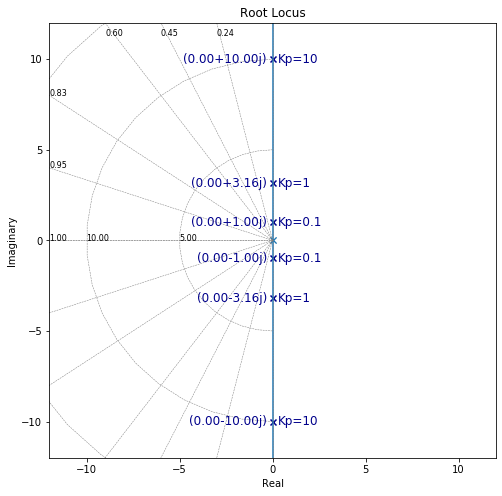

In [67]:
k = [0.1, 1, 10] #valores de K a marcar en el lugar de raíces

# obtiene las raíces r0 para los valores de K dados
r0, k0 = control.root_locus(Gol, kvect=k, plot=False)
x = [ele.real for ele in r0]
y = [ele.imag for ele in r0]

plt.figure(figsize=(8,8))
plt.scatter(x, y, marker='x', color='darkblue')

for i in range(0, len(y)):
    plt.text(x[i][0]+0.3, y[i][0]-0.2, 'Kp='+str(k[i]), fontsize = 12, ha='left', color='darkblue')
    plt.text(x[i][1]+0.3, y[i][1]-0.2, 'Kp='+str(k[i]), fontsize = 12, ha='left', color='darkblue')
    plt.text(x[i][0]-0.3, y[i][0]-0.2, '({:.2f})'.format(r0[i][0]+0), fontsize = 12, ha='right', color='darkblue')
    plt.text(x[i][1]-0.3, y[i][1]-0.2, '({:.2f})'.format(r0[i][1]+0), fontsize = 12, ha='right', color='darkblue')

rlist, klist = control.root_locus(Gol, ylim=(-max(k)-2,max(k)+2), xlim=(-max(k)-2, max(k)+2), grid=True)

Al encontrarse el lugar de raíces sobre el eje imaginario, se puede concluir que independientemente del valor de compensación proporcional (o ganancia) $K$, el sistema será siempre oscilatorio. Además podemos observar que al no tener componente real, la frecuencia natural será igual al valor de la componente imaginaria, para cada $K_p$ correspondiente. Por ejemplo, a partir del gráfico anterior, se ve que para un valor de $K_p=1$ se obtiene una $\omega_n=\omega_d=3,2 \frac{rad}{s}$

---


#### 6) Utilizando la función feedback definir el modelo de lazo cerrado y  aplicarle la función escalón unitario. Obtener las gráficas para valores de $K=0,1; K=1; K=10$


A continuación, se grafica la respuesta ($\theta_o$) a un escalón unitario, que presenta el modelo a lazo cerrado calculado en la sección 3:

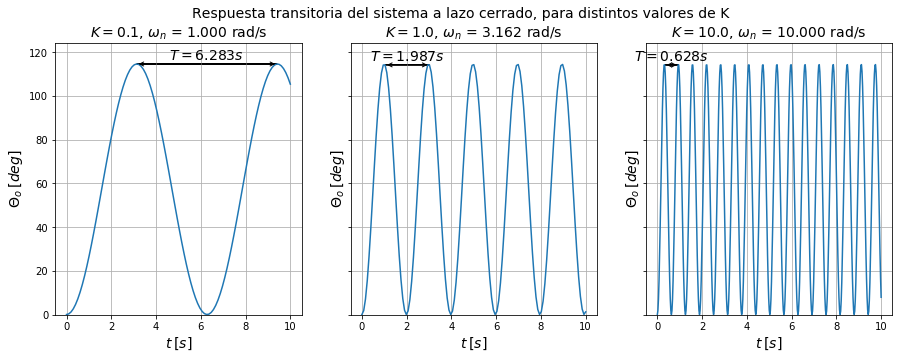

In [61]:
K = [0.1, 1, 10]

fig, axs = plt.subplots(1, len(K), sharey=True)
fig.set_size_inches(15, 5)
fig.suptitle('Respuesta transitoria del sistema a lazo cerrado, para distintos valores de K', fontsize=14)

for i, k in enumerate(K, start=0):
    GclK = control.feedback(k*Gol)
    t, yout = control.step_response(GclK, T=10)
    yout = yout*180/math.pi #pasa ángulo de salida a grados
    axs[i].plot(t, yout)
    axs[i].set_ylim(0, max(yout)+10)
    axs[i].grid()
    axs[i].set_xlabel("$t\:[s]$", fontsize=14)
    axs[i].set_ylabel("$Θ_o \:[deg]$", fontsize=14)
    wn = math.sqrt(k/J)   #frecuencia natural no amortiguada en rad/s
    fn = wn/(2*math.pi)   #en Hz
    T = 1/fn              #período
    dt = t[1]-t[0]
    # grafica flecha período
    max_y = max(yout[0:int(T/dt)])  #busca máximo dentro del primer período
    max_t = t[np.where(yout == max_y)]            
    axs[i].arrow(max_t, max_y, T, 0)
    axs[i].annotate(s='', xy=(max_t, max_y), xytext=(max_t+T, max_y), arrowprops=dict(arrowstyle='<->', lw=1))
    axs[i].text(max_t+T/2, max_y+2, '$T = {:.3f} s$'.format(T), fontsize = 14, ha='center')
    axs[i].set_title("$K = {:.1f}$, $\omega_n$ = {:.3f} rad/s".format(k, wn), fontsize=14)

                
                



En un sistema de segundo orden, como es el caso de estudio, la frecuencia natural no amortiguada $\omega_n$ viene dada por:


$$
\omega_n = \sqrt{\frac{K}{J}} 
$$

En las graficas anteriores se puede observar que aumentando la constante $K$, la frecuencia natural de la respuesta también lo hace, arribando a la misma conclusión que con el lugar de raíces obtenido anteriormente: las respuestas son oscilantes para todo valor de $K$. El período $\textit{T}$ tiene una relación: 

$$
\textit{T}=\frac{2\cdot \pi }{\omega_n}=2\pi\sqrt{\frac{J}{K}}\:[s]
$$

Este comportamiento, se puede comparar al que posee un péndulo ideal, que al lograr posicionarse en el punto medio inferior éste deja de acelerar, pero como posee inercia no se detiene en dicho punto, por lo que tiene que acelerar en sentido contrario para poder compensar, resultando en un sistema oscilatorio.

---

#### 7) Estudiar el comportamiento del sistema de lazo cerrado cuendo se incorpora un compensador tipo derivativo en el lazo directo. Obtener la función de transferencia a lazo cerrado.
 
 
Al añadir un compensador derivativo parametrizado por $(1+T_Ds)$, se obtiene la siguiente función de transferencia a lazo cerrado:


$$
G_{cl}(s)=\frac{K_p T_d s+K_p}{Js^2+K_p T_d s +K_p}
$$



![title](ft2.png)

---

#### 8) Calcular las raíces del polinomio característico con $k_p=1$ y $T_d$ como parámetro. Calcular el valor de $T_{d_{critico}}$. Decir qué tipo de respuesta al escalón se espera que tenga el sistema de lazo cerrado.

Con el compensador incorporado, se calculan las nuevas raíces del polinomio característico:

$$
s_{1,2}=\frac{-T_d\pm\sqrt{T_d^2-4\frac{J}{K_p}}}{2J}
$$

Como se puede predecir de las raíces calculadas, la incorporación del compensador derivativo permite que éstas pasen a tener parte real negativa. 

Igualando a 0 el radicando de la expresión previa, se obtiene el valor de $T_{d_{critico}}$: valor para el cual el polinomio característico tendrá dos raíces reales iguales, por lo que la respuesta al escalón del sistema realimentado será críticamente amortiguada:

$$
T_{d_{critico}} = \sqrt{\frac{4\cdot J}{K_p}}
$$


In [62]:
Kp = 1
Tdcrit = math.sqrt(4 * J / Kp)
print('Tdcrit = ', Tdcrit)

Tdcrit =  0.6324555320336759


Para $K=1$, se calcula un $T_{d_{critico}}\approx0,6324$

---

#### 9) Utilizando el paquete de control de python raficar el lugar de raíces del sistema con los valores de K que la función asigne por defecto para $T_d=0,1; T_d=T_{d_{critico}}; T_d=2$

En el gráfico siguiente, se grafica el lugar de raíces del sistema con compensación derivativa para $T_d=0,1$, $T_d=T_{d_{critico}}$ y $T_d=2$. En cada uno de ellos, se indica la posición de los pares de polos, para ciertos K particulares.

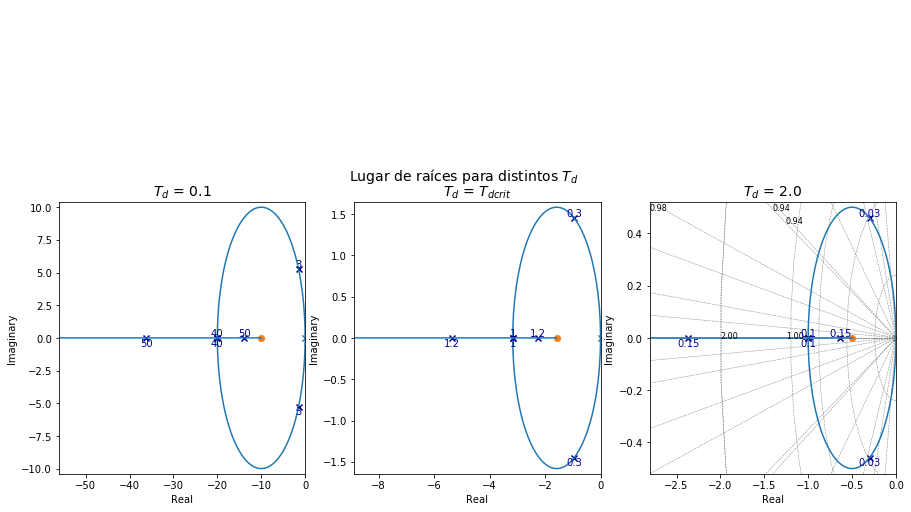

In [63]:
Td = np.array([0.1, Tdcrit, 2])  # valores de Td para graficar el lugar de raíces de c/u

fig, axs = plt.subplots(1, len(Td))
fig.set_size_inches(5*len(Td), 5)
fig.suptitle('Lugar de raíces para distintos $T_d$', fontsize=14)

k = [[3, 40, 50], [0.3, 1, 1.2], [0.03, 0.1, 0.15]] #valores de K a marcar en el lugar de raíces

for i, td in enumerate(Td, start=0):
    KD = control.tf([td, 1], [1])
    GolKD = KD*Gol
    rlist, klist = control.root_locus(GolKD, ax = axs[i], color = 'green')
    axs[i].set_title('$T_d$ = ' + (str(td) if td != Tdcrit else '$T_{dcrit}$'), fontsize=14)
    axs[i].set_xlim(axs[i].get_xlim()[0]/2, 0)
    
    # obtiene las raíces r0 para los valores de K dados    
    r0, k0 = control.root_locus(GolKD, kvect = k[i], plot = False)
    x = [ele.real for ele in r0]
    y = [ele.imag for ele in r0]
    axs[i].scatter(x, y, marker = 'x', color = 'darkblue')
    
    for j in range(0, len(k[i])):
        axs[i].text(x[j][0], y[j][0], '{}'.format(k[i][j]), fontsize = 10, ha='center', va='top', color='darkblue')
        axs[i].text(x[j][1], y[j][1], '{}'.format(k[i][j]), fontsize = 10, ha='center', va='bottom', color='darkblue')


---

#### 10) Utilizando la función $\textit{feedback}$ definir el modelo de lazo cerrado y aplicarle la función escalón unitario. Obtener las gráficas para valores de $K=0,1; K=1; K=10$ usando para cada caso los valores de Td del inciso anterior.

En primer lugar, se grafica la respuesta al escalón del sistema, para $K_p=1$ y distintos valores de $T_d$, incluyendo $T_{d_{critico}}$

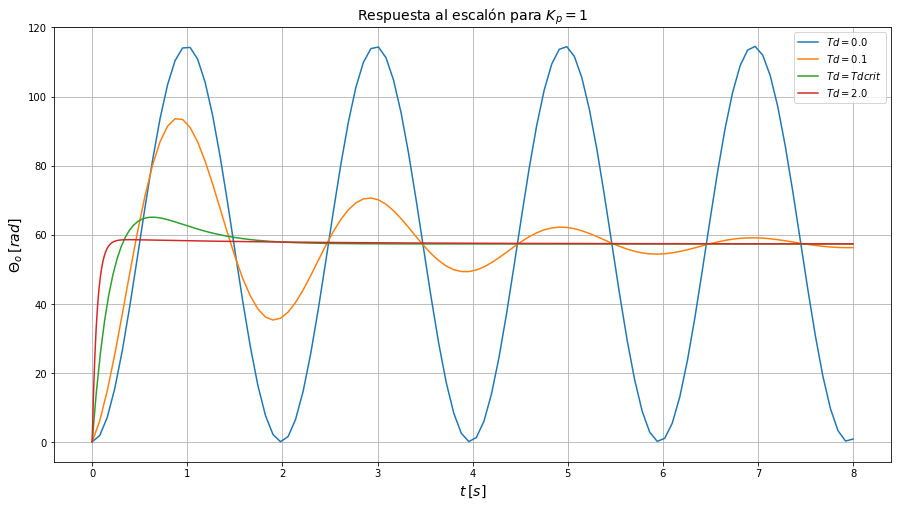

In [71]:
Kp = 1
Tdcrit = math.sqrt(2/5)
Td = np.array([0, 0.1, Tdcrit, 2 ]) # valores de Td a plotear

plt.figure(figsize=(15,8))


for td in Td:
    KD = control.tf([Kp*td, Kp], [1])
    GclKD = control.feedback(KD*Gol)
    t, yout = control.step_response(GclKD, T=8)
    yout = yout*180/math.pi #pasa ángulo de salida a grados
    sns.lineplot(t, yout, label = '$Td = $' + (str(td) if td != Tdcrit else '$Tdcrit$'))
    
plt.grid()
plt.title('Respuesta al escalón para $K_p=1$', fontsize=14)
plt.xlabel("$t\:[s]$", fontsize=14)
plt.ylabel("$Θ_o \:[rad]$", fontsize=14)

plt.show()

Se observa que al incorporar un compensador derivativo, el ángulo de saluda tiende al valor de referencia dado para $t\to\infty$. Desde el punto de vista físico, la acción del compensador derivativo se puede interpretar como una disipación de la energía cinética.

Para $T_d<T_{d_{critico}}$, la respuesta del sistema es sobreamortigua. Para $T_d>T_{d_{critico}}$ la respuesta se torna sobreamortiguada, notándose que ya no tiene sobrepasos por debajo de su valor de estado estacionario $\theta_o(\infty)$. A medida que se aumenta $T_d$, se obtiene una respuesta más parecida al escalón unitario, tal como se ve para $T_d=2$. El compensador  derivativo entonces convierte el sistema inestable a un sistema estable añadiendo atenuación para evitar la oscilación.

También se comprueba que la frecuencia natural amortiguada $\omega_d$, queda determinada únicamente por $K_p$, siendo independiente del valor de $T_d$. Ésto se ve en la coincidencia en los cruces por cero $ \forall $ $T_d<T_{d_{critico}}$ 

A continuación se grafica el la respuesta al escalón para disintos valores de K, con sus respectivos valores de $T_{d_{critico}}$

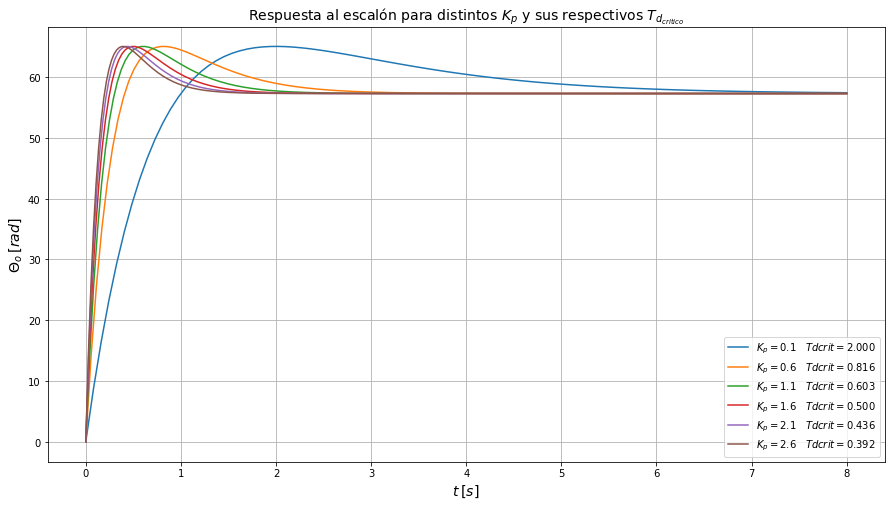

In [65]:
K = np.arange(0.1, 3, 0.5) #Valores de Kd a plotear
plt.figure(figsize=(15,8))


for k in K:
    Tdcrit = math.sqrt(4*J/k)
    KD = control.tf([k*Tdcrit, k], [1])
    GclKD = control.feedback(KD*Gol)
    t, yout = control.step_response(GclKD, T=8)
    yout = yout*180/math.pi #pasa ángulo de salida a grados
    sns.lineplot(t, yout, label = '$K_p = {:.1f}$   $Tdcrit = {:.3f}$'.format(k, Tdcrit))

plt.grid()
plt.title('Respuesta al escalón para distintos $K_p$ y sus respectivos $T_{d_{critico}}$', fontsize=14)
plt.xlabel("$t\:[s]$", fontsize=14)
plt.ylabel("$Θ_o \:[rad]$", fontsize=14)
plt.show()

En este caso, al utilizar el $T_{d_{critico}}$ para cada $K_p$, se mantiene la respuesta críticamente amortiguada. De esta manera nos encontramos con un sobrepico, el cual mantiene una amplitud constante, variando únicamente la velocidad de respuesta de nuestro sistema.

Finalmente, se grafican las respuestas para distintas combinaciones de $K_p$ y $T_d$:

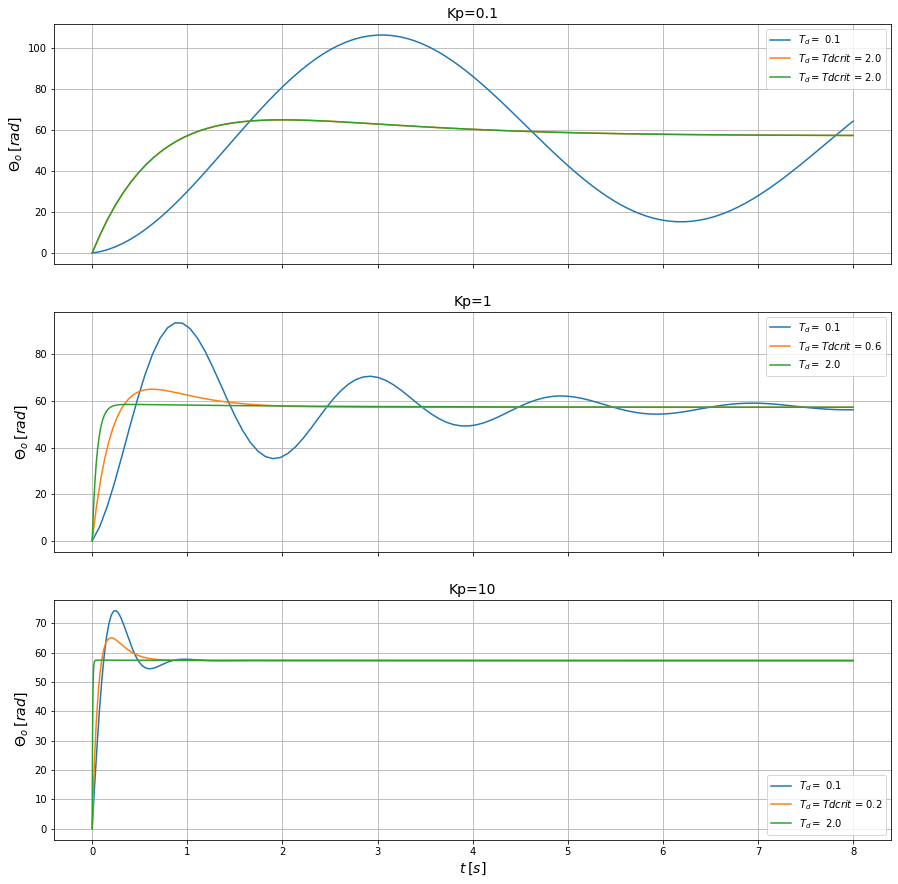

In [70]:
Kp = [0.1, 1 ,10]                   #valores de Kp a plotear

fig, axs = plt.subplots(len(Kp), sharex=True)
fig.set_size_inches(15, 5*len(Td))

for i, kp in enumerate(Kp, start=0):
    tdcrit = math.sqrt(4*J/kp)
    Td = np.array([0.1, tdcrit, 2]) # valores de Td a plotear para cada valor de Kp
    Td = np.sort(Td)
    for td in Td:
        KD = control.tf([kp*td, kp], [1])
        GclKD = control.feedback(KD*Gol)
        t, yout = control.step_response(GclKD, T=8)
        yout = yout*180/math.pi #pasa ángulo de salida a grados
        sns.lineplot(t, yout, ax=axs[i], label = '$T_d =$ {:.1f}'.format(td) if td != tdcrit else '$T_d = Tdcrit$ = {:.1f}'.format(td))
        axs[i].set_ylabel("$Θ_o \:[rad]$", fontsize=14)
        axs[i].set_title('Kp={}'.format(kp), fontsize=14)
        axs[i].grid(True)
        
axs[i].set_xlabel("$t\:[s]$", fontsize=14)
plt.show()


#### Conclusiones

Se pudo observar que para el modelo del balancín a lazo cerrado sin compensación derivativa, al ser excitarlo con una señal de tipo escalón, no existe valor de $K_p$ posible para estabilizar el sistema y evitar la oscilación del mismo. Esto se debe, a que no existe una componente que disipe energía cinética ya que el modelo utilizado es un modelo idealizado que no contempla, por ejemplo, pérdidas por rozamiento. Sin embargo, las pérdidas por rozamiento con el aire que pueda tener un balancín de 1 DOF o un multirrotor de 9 DOF, son despreciables comparadas con la dinámica propia de esos sistemas. Esto nos lleva a la conclusión de que el modelo de balancín utilizado, es un buen modelo de estudio.

Al agregar el compensador de tipo derivativo y cerrar el lazo, se transforma el lugar de raíces llevándolo hacia el semiplano izquierdo, logrando así la estabilidad del sistema. La respuesta al escalón dependerá del valor que tome tanto $K_p$ como $T_d$ Según el valor que adquieran los mismos se puede observar como el sistema puede ser sub-amortiguado, críticamente-amortiguado, sobre-amortiguado u oscilatorio para el caso de $T_d=0$. 

La adición de un compensador derivativo, implica disipación de la energía cinética del balancín. 




